### TASK - TO FIND A DECISION TREE ALGORITHM FOR A GIVEN IRIS SET DATA

### DECISION TREE:

Decision Trees are a type of Supervised Machine Learning Algorithm, where its a diagram or chart that people use to determine a course of action or show a statistical probability. Each branch of the decision tree represents a possible decision, outcome, or reaction.

### Why do we use Decision Tree?

- The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data). 

- In Decision Trees, for predicting a class label for a record we start from the root of the tree.

### Where is decision tree used?

Decision trees are commonly used in operations research, specifically in decision analysis, to help identify a strategy most likely to reach a goal, but are also a popular tool in machine learning.

### How decision tree is used for classification?

- Decision tree builds classification or regression models in the form of a tree structure. 
- It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed.
- Decision trees can handle both categorical and numerical data.

### What is the purpose of a decision tree?

- Decision trees help you to evaluate our options. 
- Decision Trees are excellent tools for helping you to choose between several courses of action. 
- They provide a highly effective structure within which you can lay out options and investigate the possible outcomes of choosing those options.

### Why are decision trees bad?

- Among the major decision tree disadvantages are its complexity. 
- Computing probabilities of different possible branches, determining the best split of each node, and selecting optimal combining weights to prune algorithms contained in the decision tree are complicated tasks that require much expertise and experience.

### IMPORTING THE NECESSARY LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\admin\Downloads\DATASETS/Iris.csv')

In [4]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.shape

(150, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

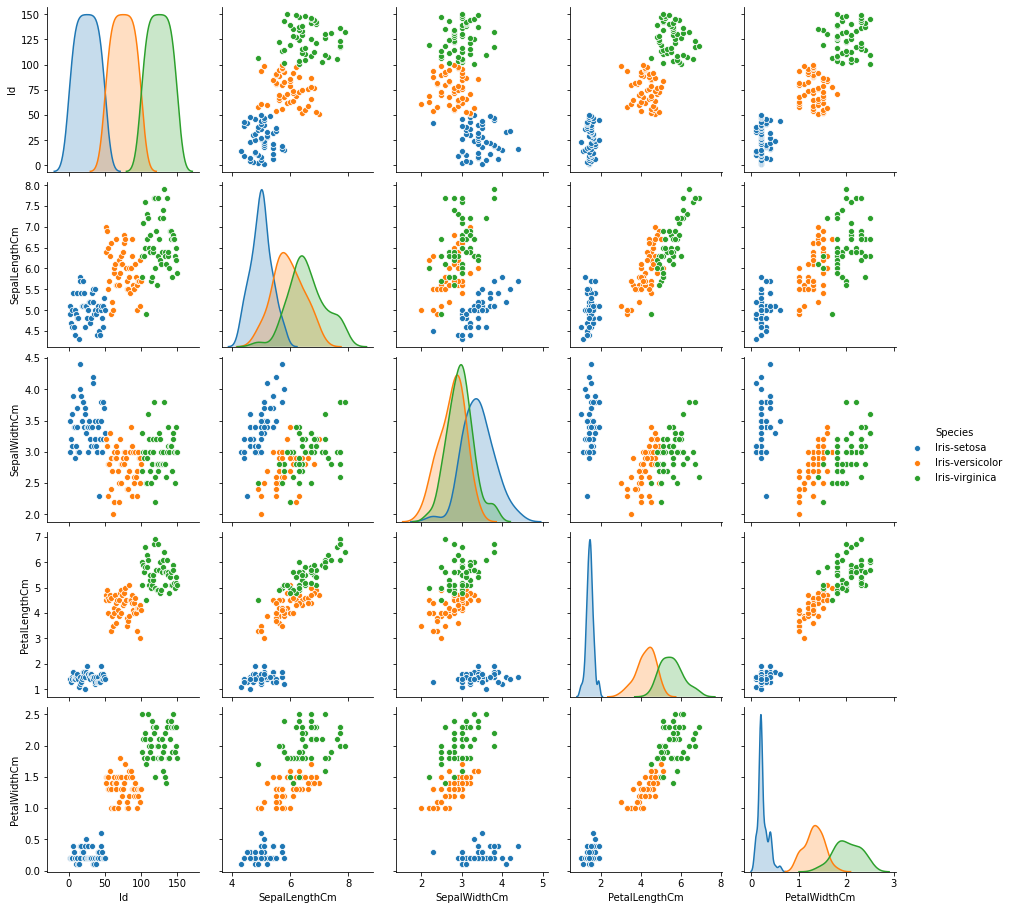

In [11]:
sns.pairplot(df, hue = "Species")

In [12]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Maximum Depth: 

- Max Depth. Controls the maximum depth of the tree that will be created. 
- It can also be described as the length of the longest path from the tree root to a leaf. 
- The root node is considered to have a depth of 0.

In [14]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 3)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [15]:
y_test_pred = classifier.predict(X_test)

### Accuracy: 
The number of correct predictions made divided by the total number of predictions made. 

- We're going to predict the majority class associated with a particular node as True. i.e. use the larger value attribute from each node.

In [16]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.9736842105263158

### Confusion Matrix:

A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. 

- The matrix compares the actual target values with those predicted by the machine learning model.

In [17]:
con_metric = metrics.confusion_matrix(y_test, y_test_pred)
con_metric

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

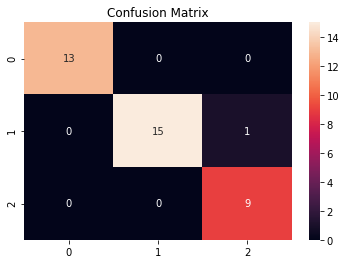

In [18]:
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

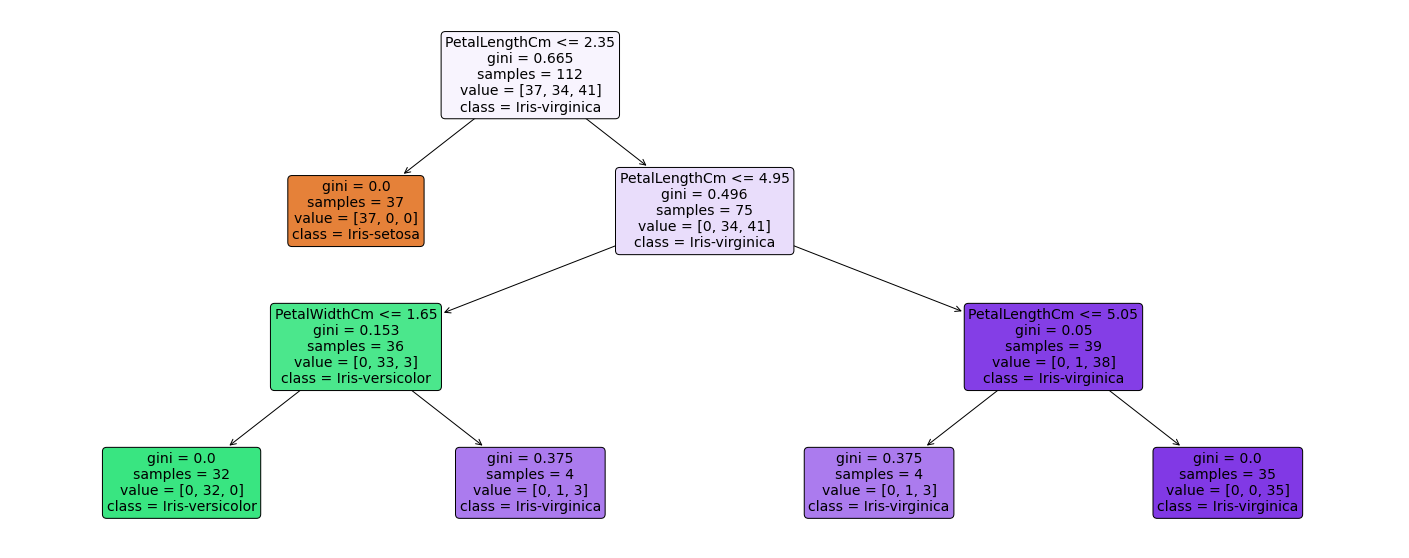

In [19]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,10))
f = plot_tree(classifier, feature_names = X_train.columns, class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], 
              filled = True, rounded = True, fontsize = 14)

### What happens if the maximum depth decreases?

- The maximum depth that you allow the tree to grow to. 
- But if you set it too low, that is not good as well; then you might be giving the decision tree too little flexibility to capture the patterns and interactions in the training data.

In [20]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [22]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 1)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [23]:
y_test_pred = classifier.predict(X_test)

In [24]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.5789473684210527

In [25]:
con_metric = metrics.confusion_matrix(y_test, y_test_pred)
con_metric

array([[13,  0,  0],
       [ 0,  0, 16],
       [ 0,  0,  9]], dtype=int64)

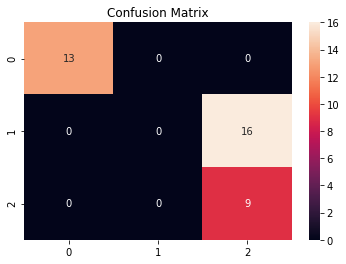

In [26]:
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

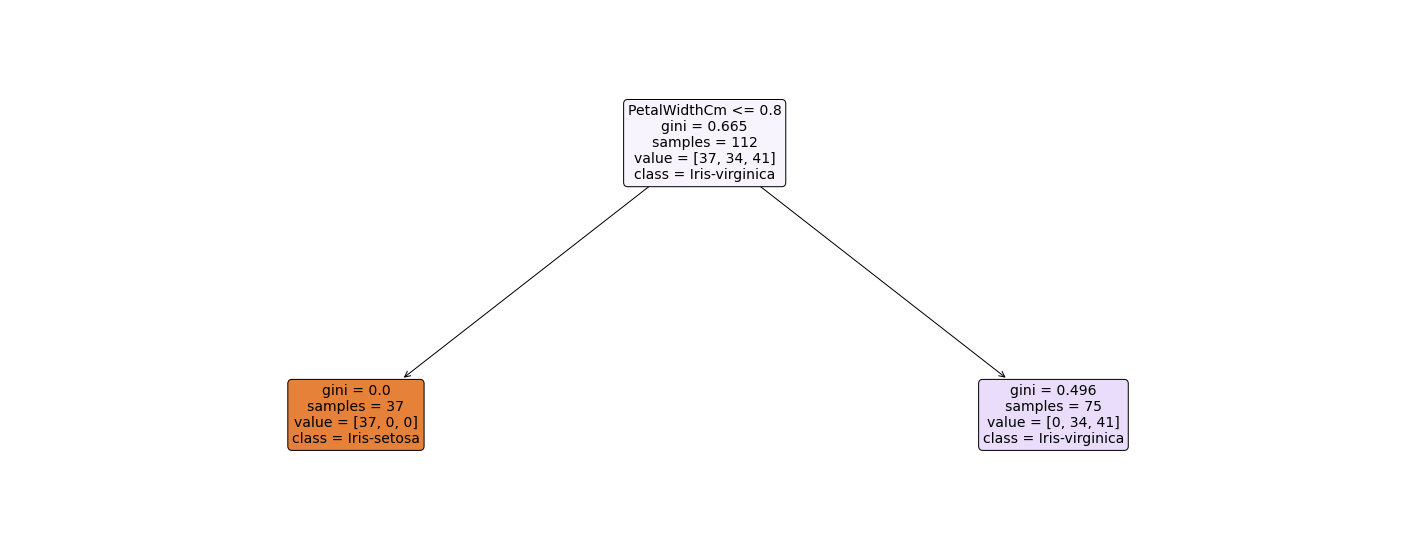

In [27]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,10))
f = plot_tree(classifier, feature_names = X_train.columns, class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], 
              filled = True, rounded = True, fontsize = 14)

### What happens if the maximum depth increases?

- The maximum depth that you allow the tree to grow to. 
- The deeper you allow, the more complex your model will become. 
- For training error, it is easy to see what will happen. 
- If you increase max_depth, training error will always go down (or at least not go up).

In [28]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [30]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 4)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [31]:
y_test_pred = classifier.predict(X_test)

In [32]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.9736842105263158

In [33]:
con_metric = metrics.confusion_matrix(y_test, y_test_pred)
con_metric

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

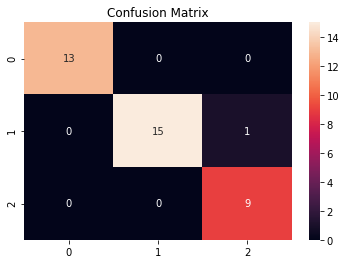

In [34]:
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

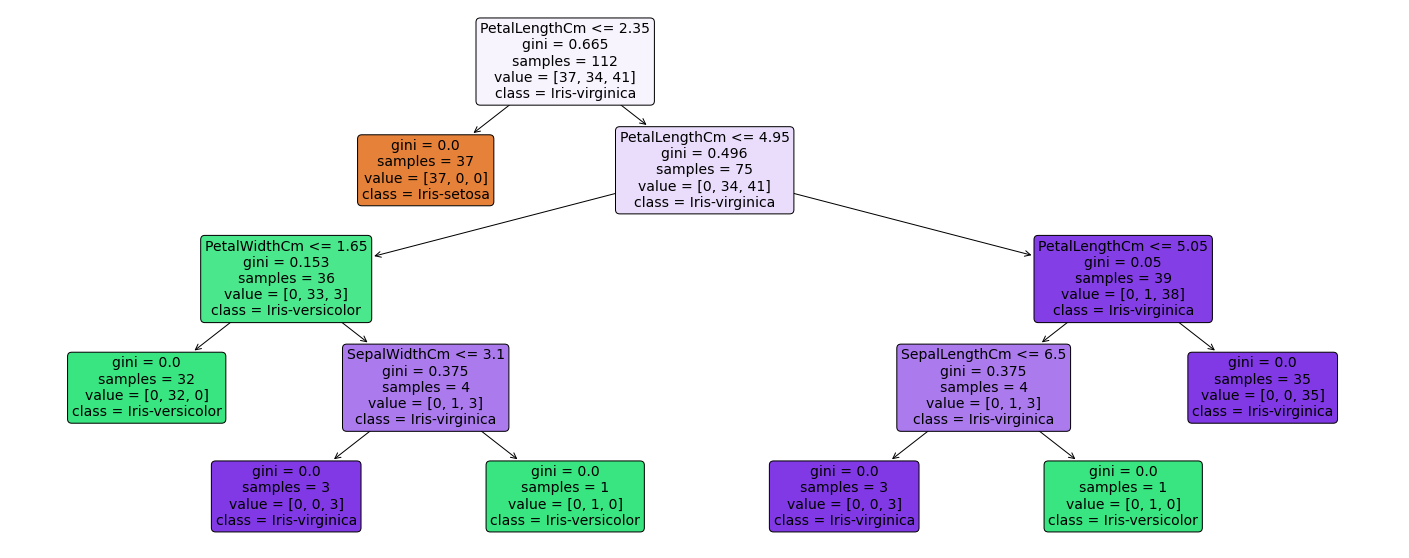

In [35]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,10))
f = plot_tree(classifier, feature_names = X_train.columns, class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], 
              filled = True, rounded = True, fontsize = 14)

### Advantages of decision trees:

- Compared to other algorithms decision trees requires less effort for data preparation during pre-processing.
- A decision tree does not require normalization of data.
- A decision tree does not require scaling of data as well.
- Missing values in the data also do NOT affect the process of building a decision tree to any considerable extent.
- A Decision tree model is very intuitive and easy to explain to technical teams as well as stakeholders.


### Disadvantages of decision trees: 

- A small change in the data can cause a large change in the structure of the decision tree causing instability.
- For a Decision tree sometimes calculation can go far more complex compared to other algorithms.
- Decision tree often involves higher time to train the model.
- Decision tree training is relatively expensive as the complexity and time has taken are more.
- The Decision Tree algorithm is inadequate for applying regression and predicting continuous values.
- They are often relatively inaccurate. 
- Many other predictors perform better with similar data.